In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import argparse

In [64]:
global_historys = list()
saved_files = list()
plot_labels = list()

In [65]:
def float_range(mini, maxi):
    """Return function handle of an argument type function for 
       ArgumentParser checking a float range: mini <= arg <= maxi
         mini - minimum acceptable argument
         maxi - maximum acceptable argument"""

    # Define the function with default arguments
    def float_range_checker(arg):
        """New Type function for argparse - a float within predefined range."""

        try:
            f = float(arg)
        except ValueError:    
            raise argparse.ArgumentTypeError("must be a floating point number")
        if f < mini or f > maxi:
            raise argparse.ArgumentTypeError("must be in range [" + str(mini) + " .. " + str(maxi)+"]")
        return f

    # Return function handle to checking function
    return float_range_checker

In [66]:
parser = argparse.ArgumentParser(prog="plot_saved_log.py 'file1.npz' 'label1' 'file2.npz' 'label2' ... ",
                                 description="Plotting saved log from '.npz' format",
                                 epilog="Written by Ali Bozorgzad for comparing results")

parser.add_argument("--loss_title", "-l", dest="loss_title", type=str, default="Loss on data",
                    help="plot title for loss, put it between \"name\"")
parser.add_argument("--acc_title", "-a", dest="acc_title", type=str, default="Accuracy on data",
                    help="plot title for accuracy, put it between \"name\"")
parser.add_argument("--start_per", "-s", dest="start_per", type=float_range(0, 1), default="0",
                    help="change the start range of data with %%, between [0...1] 1 is 100%%")
parser.add_argument("--end_per", "-e", dest="end_per", type=float_range(0, 1), default="1",
                    help="change the end range of data with %%, between [0...1] 1 is 100%%")
parser.add_argument("--plot_save_name", "-n", dest="plot_save_name", type=str, default="NONE",
                    help="plots will be saved, if you set this, put it between \"name\"")
parser.add_argument("--show_plot", "-p", dest="show_plot", type=int, default="1",
                    help="set '0', if u want to not showing plot", choices=[0, 1])
parser.add_argument("--plot_dpi", "-d", dest="plot_dpi", type=float_range(10, 1000), default="100",
                    help="set dpi for plotting figures, between [10...1000]")

args, unknown = parser.parse_known_args()
loss_title = args.loss_title
acc_title = args.acc_title
start_per = args.start_per
end_per = args.end_per
plot_save_name = args.plot_save_name
show_plot = args.show_plot
plot_dpi = args.plot_dpi
matplotlib.rcParams["figure.dpi"] = plot_dpi


for i, arg in enumerate(unknown):
    if i % 2 == 0:
        saved_files.append(arg)
    else:
        plot_labels.append(arg)

In [67]:
# set parameters (Manual)
saved_files = list()
plot_labels = list()

saved_files.append("FA_CIFAR10_Conv2_10c_64b_1.0cp_equal_1rs_0.001lr_2ce_step_90.npz")
saved_files.append("FA_CIFAR10_Conv2_5c_64b_1.0cp_equal_1rs_0.001lr_1ce_step_90.npz")
# saved_files.append("FSS_CIFAR10_Conv_cka_rbf_best_10c_64b_91s_1.0cp_1rs_0.001lr_2ce_1pes_3_10_step_90.npz")
# saved_files.append("FSS_FEMNIST_Conv_cka_rbf_best_5c_64b_91s_1.0cp_1rs_0.001lr_1ce_1pes_3_10_step_14.npz")

plot_labels.append("t1")
plot_labels.append("t2")
# plot_labels.append("t3")
# plot_labels.append("t4")

loss_title = "Loss on data"
acc_title = "Accuracy on data"
start_per = 0
end_per = 1
plot_save_name = "NONE"
show_plot = 1
matplotlib.rcParams["figure.dpi"] = 1000

In [68]:
for sf in saved_files:
    npzFile = np.load(f"save_log/{sf}", allow_pickle=True)
    global_historys.append(npzFile["global_history"].item())
    npzFile.close()

In [69]:
if start_per != 0 or end_per != 1:
    length = len(global_historys[0]["loss"])
    for gh in global_historys:
        if length != len(gh["loss"]):
            raise Exception("Cannot set 'start_per' and 'end_per' when length are diffrent.")

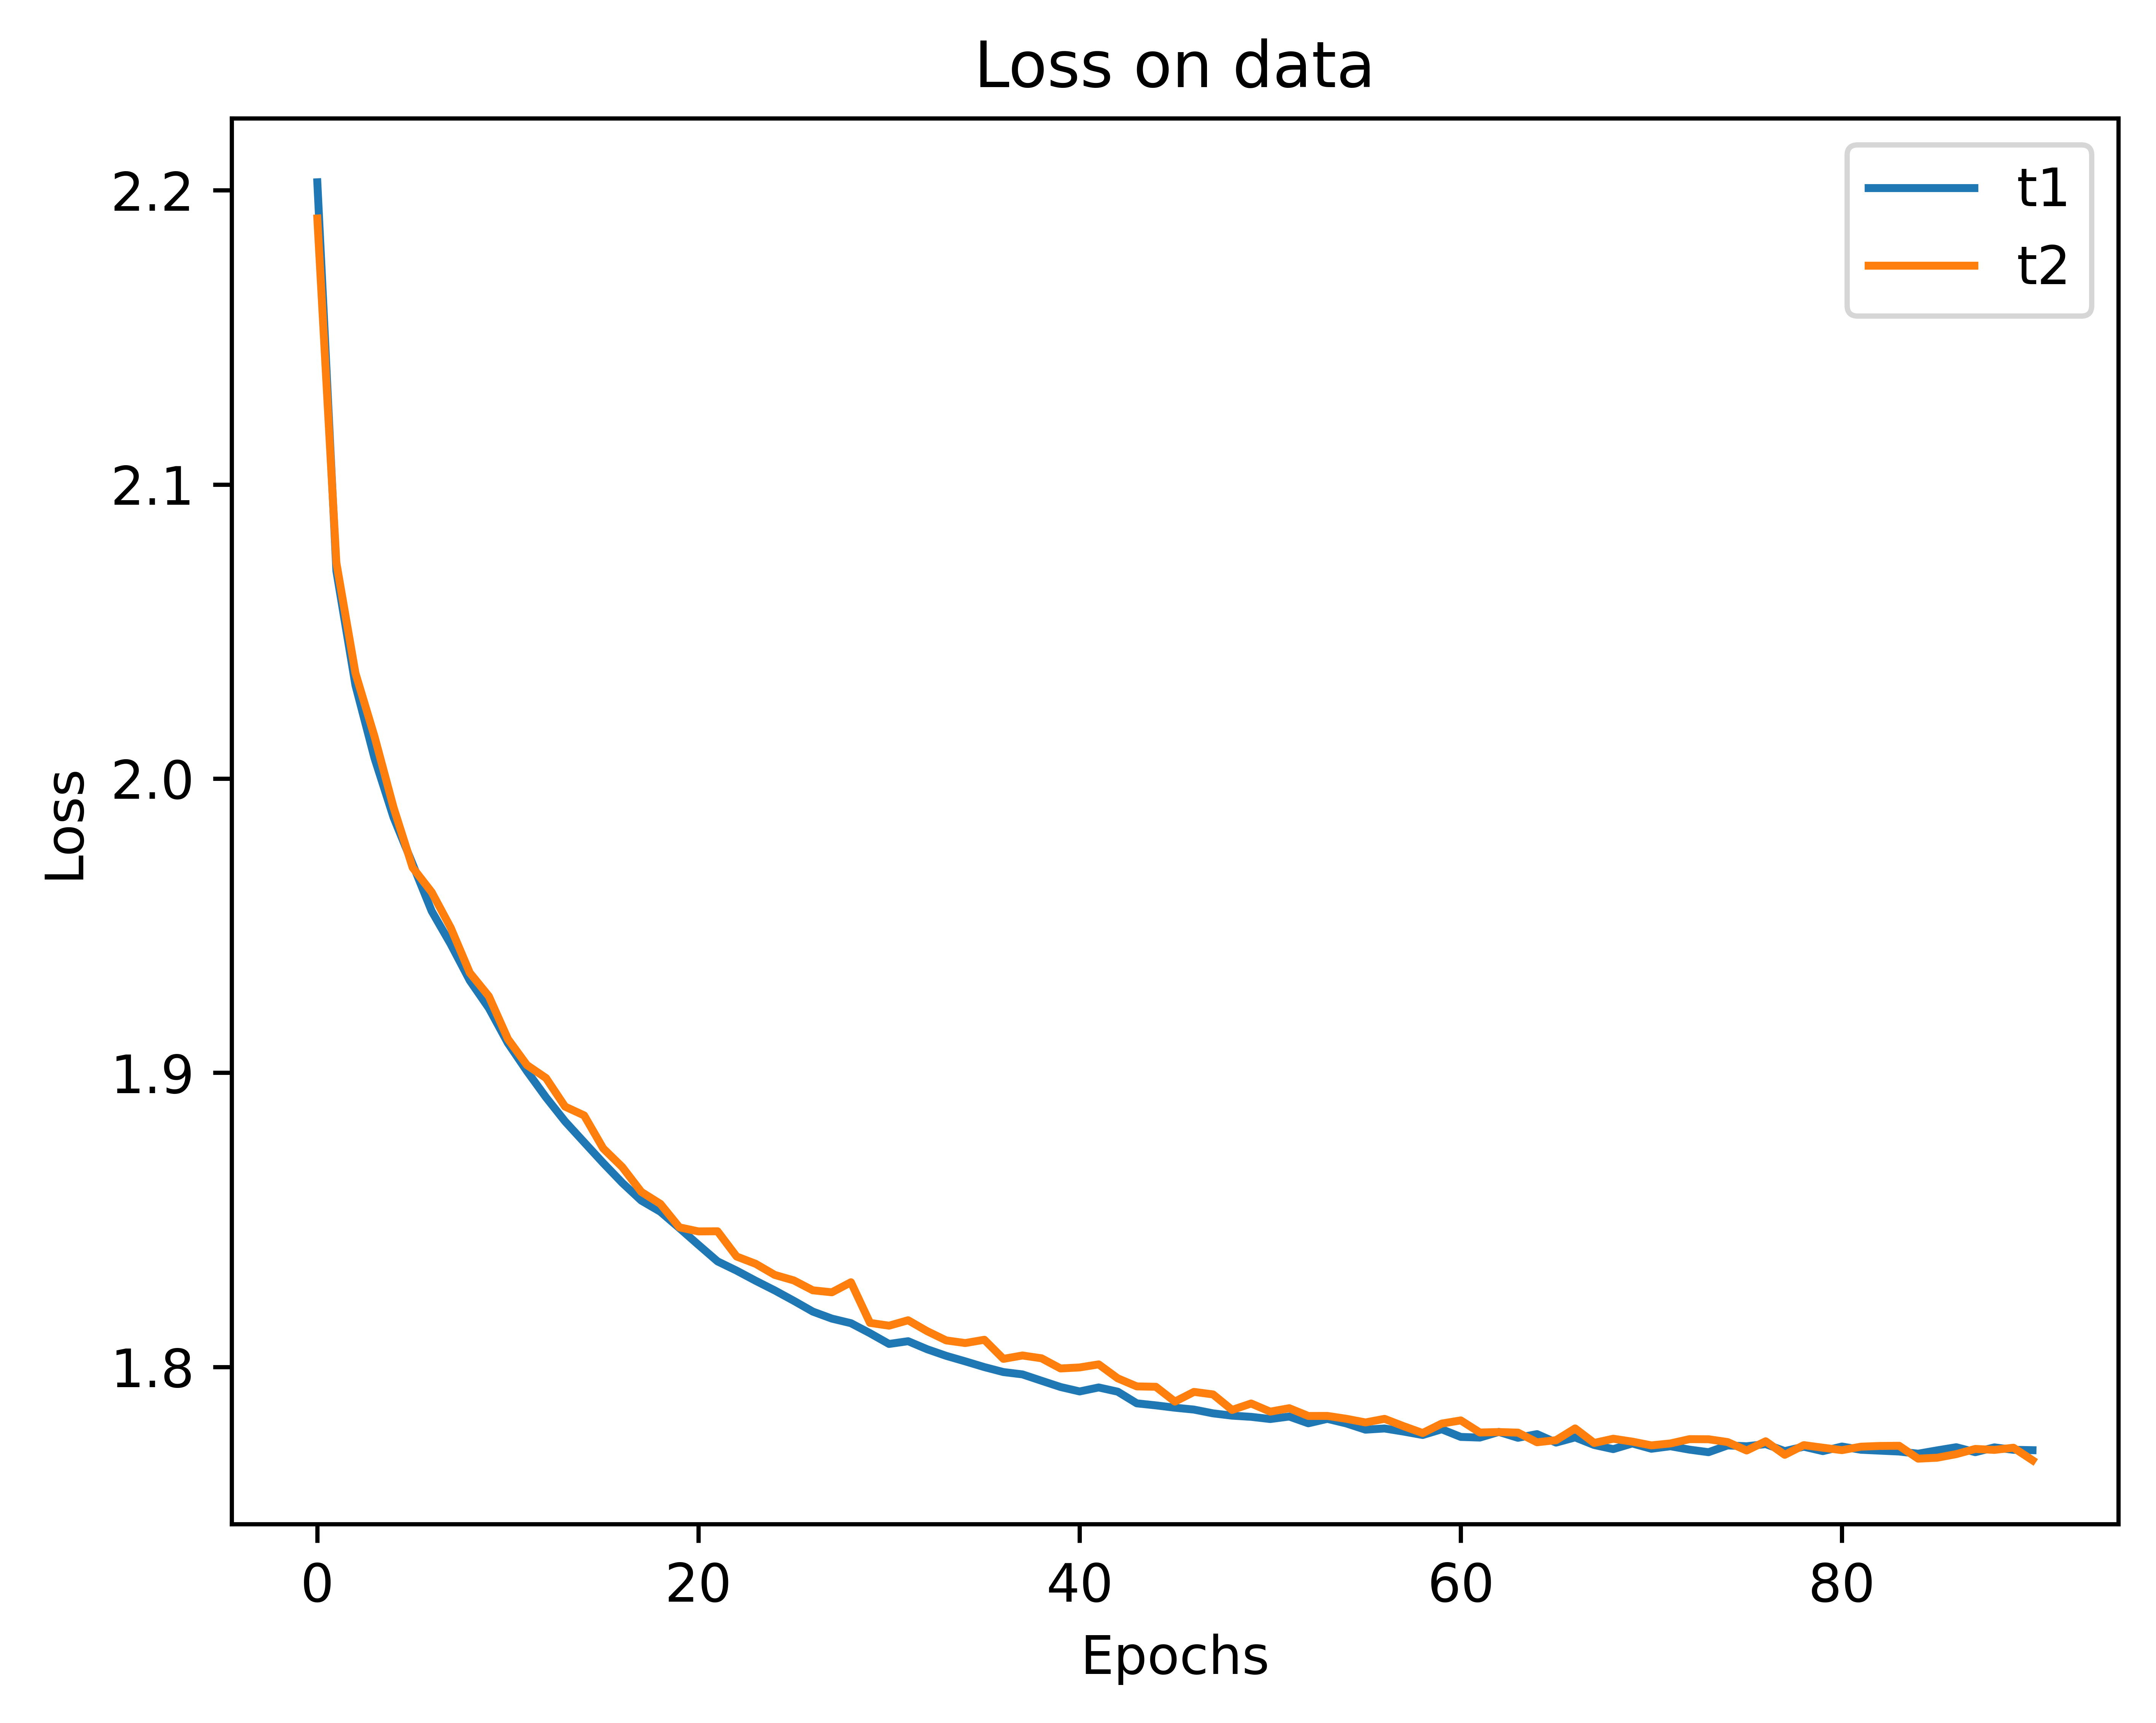

In [70]:
for i, gh in enumerate(global_historys):
    si = int(start_per * len(gh["loss"])) # use in for, if the len are diffrent
    ei = int(end_per * len(gh["loss"]))
    plt.plot(range(si, ei), gh["loss"][si:ei], label=plot_labels[i])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title(loss_title)
plt.legend()

if plot_save_name != 'NONE':
    plt.savefig(f"save_log/{plot_save_name}_loss.jpg")

if show_plot:
    plt.show()

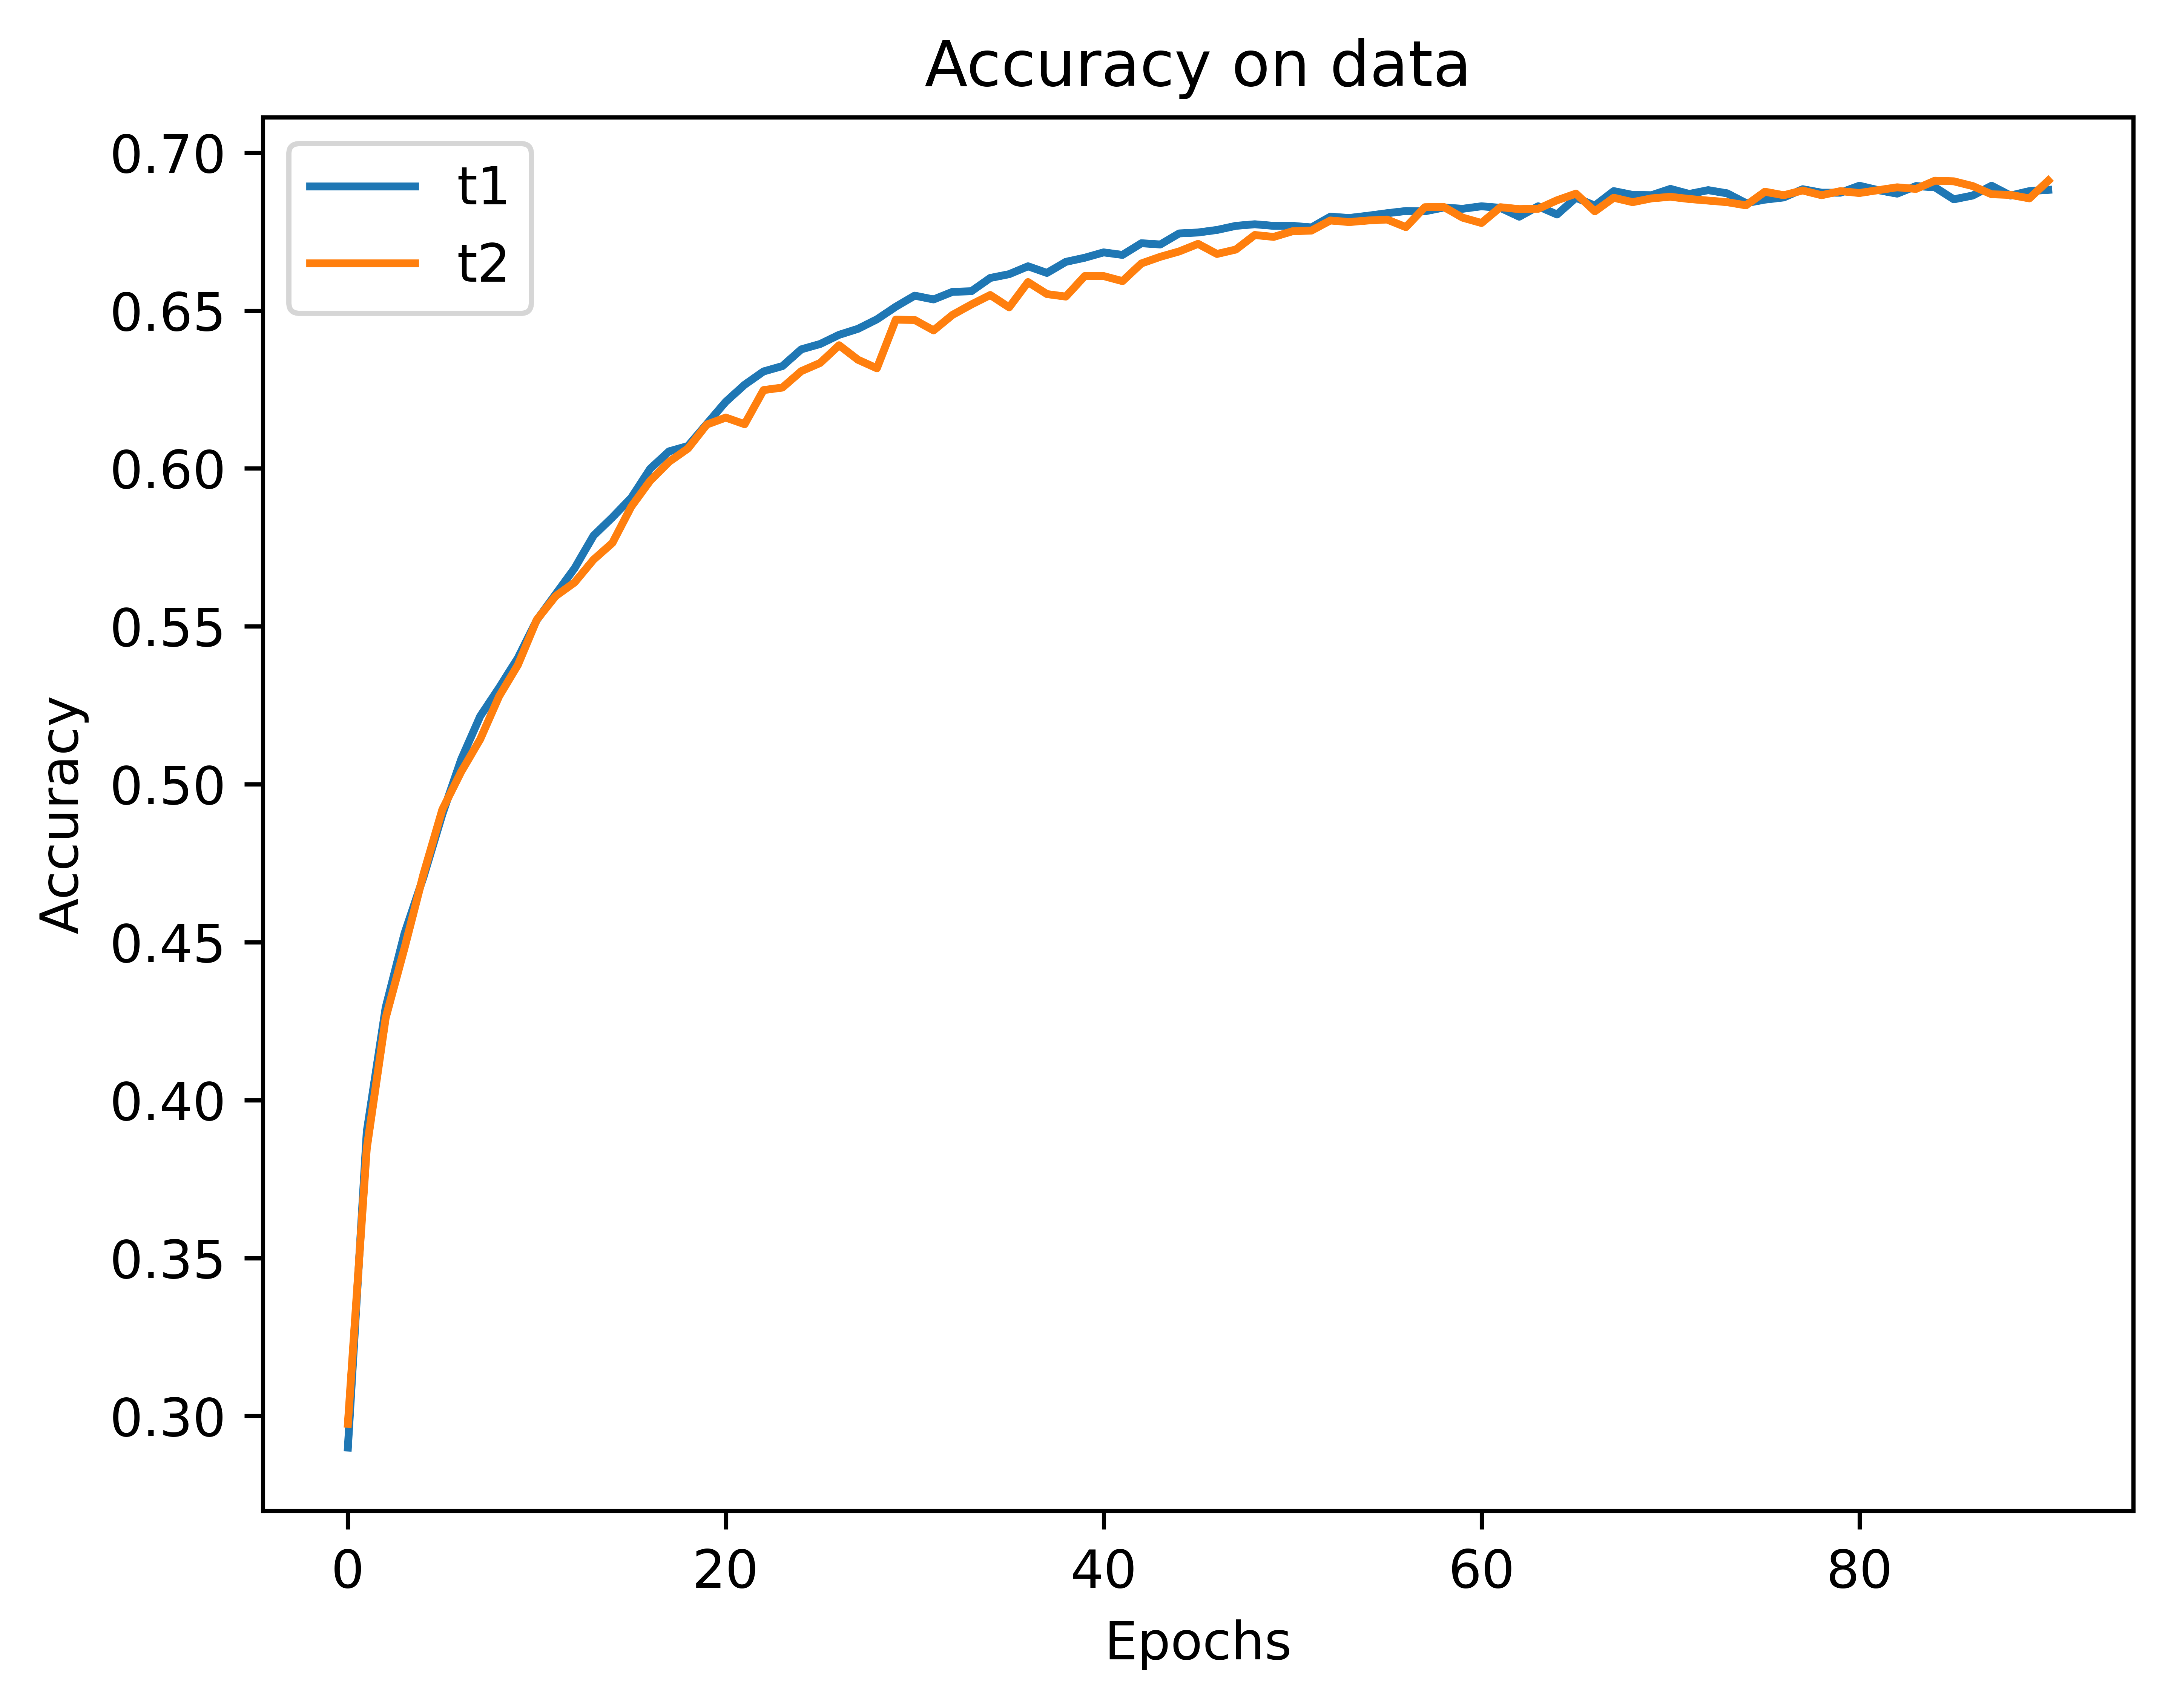

In [71]:
plt.clf() # clear the figure

for i, gh in enumerate(global_historys):
    si = int(start_per * len(gh["loss"]))
    ei = int(end_per * len(gh["loss"]))
    plt.plot(range(si, ei), gh["accuracy"][si:ei], label=plot_labels[i])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title(acc_title)
plt.legend()

if plot_save_name != 'NONE':
    plt.savefig(f"save_log/{plot_save_name}_accuracy.jpg")

if show_plot:
    plt.show()